### importing the liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preprocessing

In [2]:
creditcard_data = pd.read_csv("Marketing_data.csv")
creditcard_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
creditcard_data.shape

(8950, 18)

In [4]:
creditcard_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
for cal in list(creditcard_data):
    print(cal,'--->',creditcard_data[cal].nunique())
    
# each column wise unique no of values

CUST_ID ---> 8950
BALANCE ---> 8871
BALANCE_FREQUENCY ---> 43
PURCHASES ---> 6203
ONEOFF_PURCHASES ---> 4014
INSTALLMENTS_PURCHASES ---> 4452
CASH_ADVANCE ---> 4323
PURCHASES_FREQUENCY ---> 47
ONEOFF_PURCHASES_FREQUENCY ---> 47
PURCHASES_INSTALLMENTS_FREQUENCY ---> 47
CASH_ADVANCE_FREQUENCY ---> 54
CASH_ADVANCE_TRX ---> 65
PURCHASES_TRX ---> 173
CREDIT_LIMIT ---> 205
PAYMENTS ---> 8711
MINIMUM_PAYMENTS ---> 8636
PRC_FULL_PAYMENT ---> 47
TENURE ---> 7


In [6]:
creditcard_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### missing values

In [7]:
creditcard_data.isnull().sum()

# CREDIT_LIMIT, MINIMUM_PAYMENTS are having null values so use to apply the mean 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
credit_limit = creditcard_data['CREDIT_LIMIT'].mean()
minimum_payment = creditcard_data['MINIMUM_PAYMENTS'].mean()

creditcard_data['CREDIT_LIMIT'].fillna(credit_limit,inplace=True)
creditcard_data['MINIMUM_PAYMENTS'].fillna(minimum_payment,inplace=True)

In [9]:
creditcard_data.isnull().sum()

# no missing values

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# here the CUST_ID is the not usful on modelling so drop this column

creditcard_data.drop('CUST_ID',axis=1,inplace=True)

### Exploratory Data Analysis

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

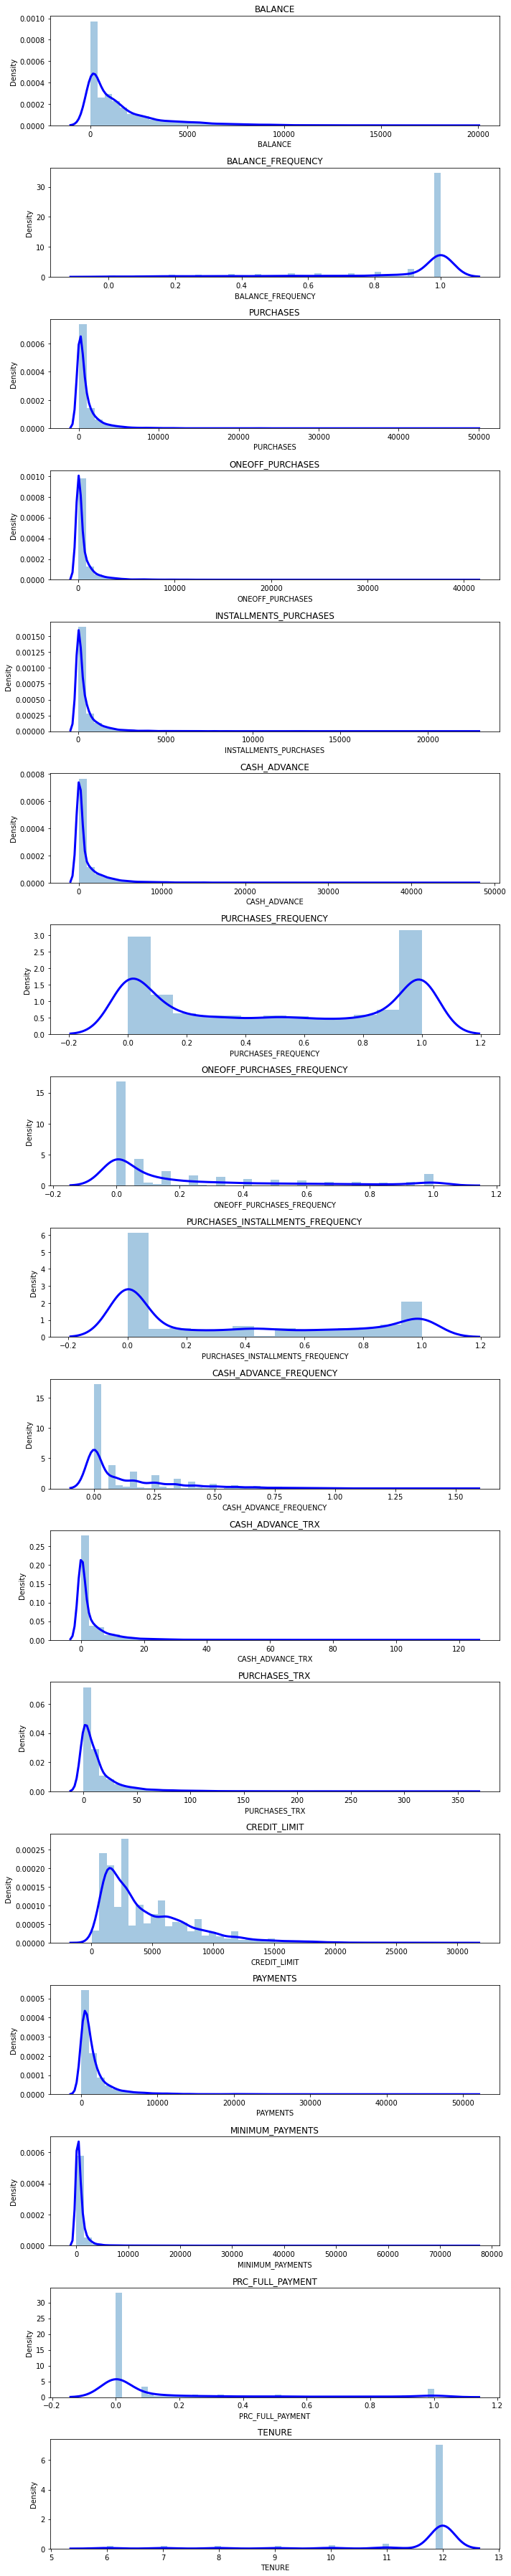

In [11]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_data.columns)):
    plt.subplot(len(creditcard_data.columns),1,i+1)
    sns.distplot(creditcard_data[creditcard_data.columns[i]],kde_kws={"color": "b", "lw": 3, "label": "KDE"})
    plt.title(creditcard_data.columns[i])
plt.tight_layout()
plt.show()

In [12]:
#check the corelation between the each and every column
corr = creditcard_data.corr()

<AxesSubplot:>

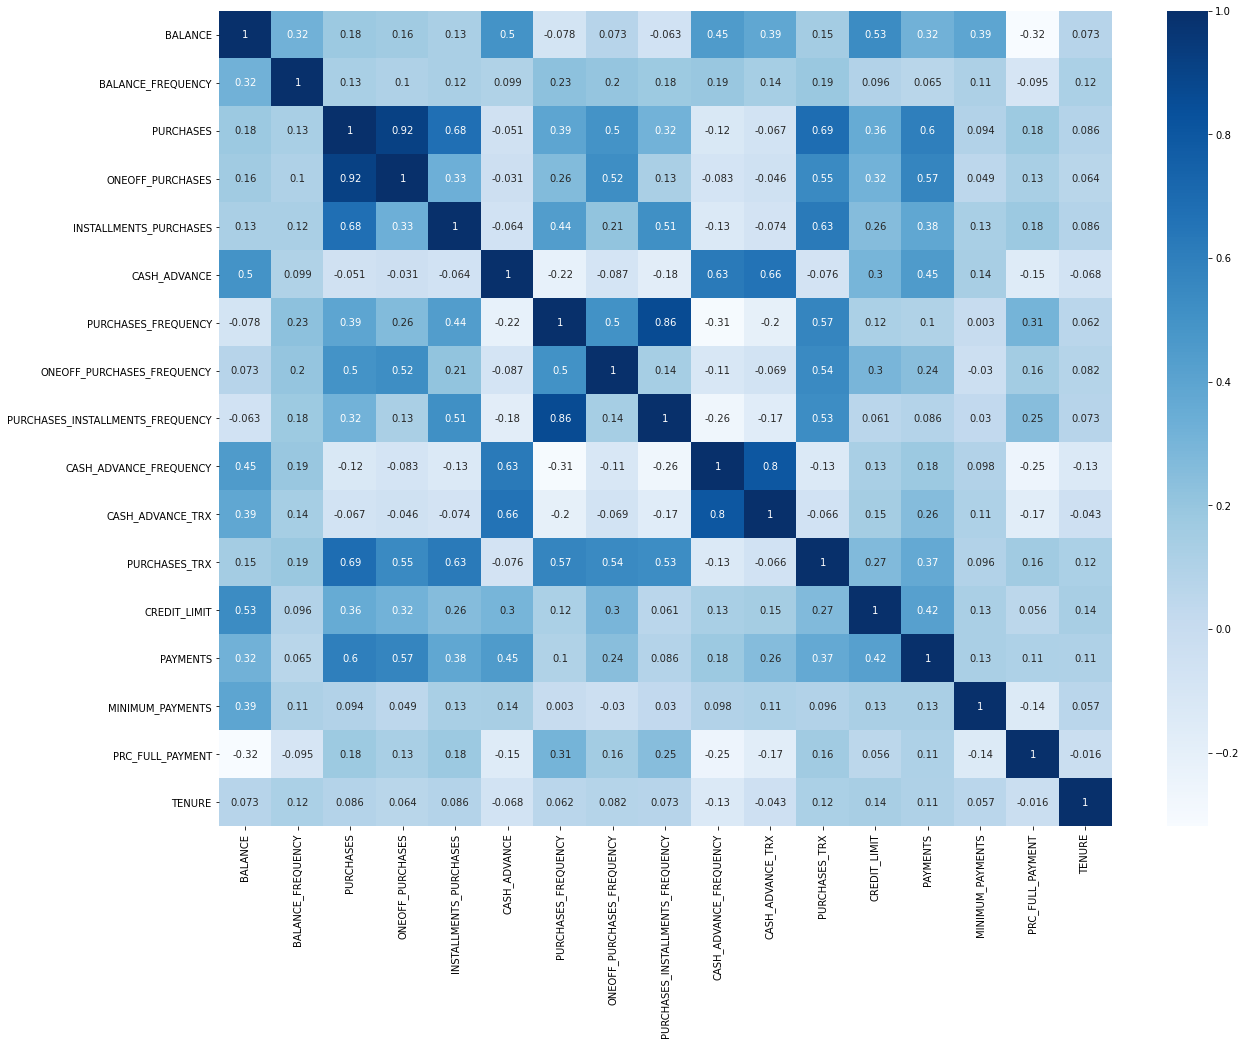

In [26]:
# heatmap
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(corr,annot = True,cmap='Blues')

### Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

creditcard_data_scaled = scaler.fit_transform(creditcard_data)

creditcard_data_scaled[:2]

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
        -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
        -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
         2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
         0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
         0.2342269 ,  0.36067954]])

### lets find the check the number of clusters

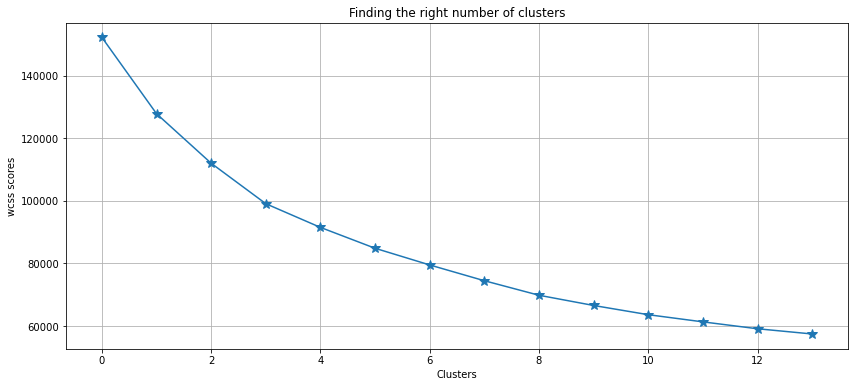

In [15]:
from sklearn.cluster import KMeans
wcss=[]  #within cluster sum of squares

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(14,6))
plt.plot(wcss,'*-',markersize=10)
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('wcss scores') 
plt.grid()

#### obervation : here we have 15 points but the elbow curve is in 8th point so the kmeans cluster is also 8 

### scaled 8 clusted KMeans

In [16]:
kmeans = KMeans(n_clusters=8)
predict = kmeans.fit_predict(creditcard_data_scaled)

kmeans.labels_

array([1, 3, 0, ..., 2, 2, 2])

In [17]:
print(predict)

[1 3 0 ... 2 2 2]


In [18]:
kmeans.cluster_centers_[:2]

array([[ 1.38616408e-01,  4.29754430e-01,  9.51631891e-01,
         9.04676840e-01,  5.88056772e-01, -3.08142662e-01,
         1.09549481e+00,  1.87572437e+00,  5.40230036e-01,
        -4.08896823e-01, -3.17824938e-01,  1.20775968e+00,
         7.11780684e-01,  3.95729560e-01, -5.18654351e-02,
         4.58448684e-01,  3.07474080e-01],
       [ 1.22537949e-03,  4.01867774e-01, -3.42963737e-01,
        -2.24255215e-01, -3.98827037e-01, -1.12306767e-01,
        -8.05474195e-01, -3.33425066e-01, -7.49992192e-01,
         7.29889452e-02, -4.99157355e-02, -4.63714549e-01,
        -3.05148074e-01, -2.49805199e-01, -5.01239501e-02,
        -4.52270890e-01,  2.72472768e-01]])

### apply Principal component analysis

In [19]:
from sklearn.decomposition import PCA  # PCA using for dimentionality reduction method
pca = PCA(n_components=2)

principal_comp = pca.fit_transform(creditcard_data_scaled)
principal_comp[:2]

array([[-1.68221869, -1.07644925],
       [-1.13829348,  2.5064819 ]])

In [27]:
pca_data = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_data.head()

,pca1,pca2
0,-1.682219,-1.076449
1,-1.138293,2.506482
2,0.969685,-0.383523
3,-0.873625,0.043170
4,-1.599433,-0.688581


In [21]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':predict})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076449,1
1,-1.138293,2.506482,3
2,0.969685,-0.383523,0
3,-0.873625,0.043170,1
4,-1.599433,-0.688581,1


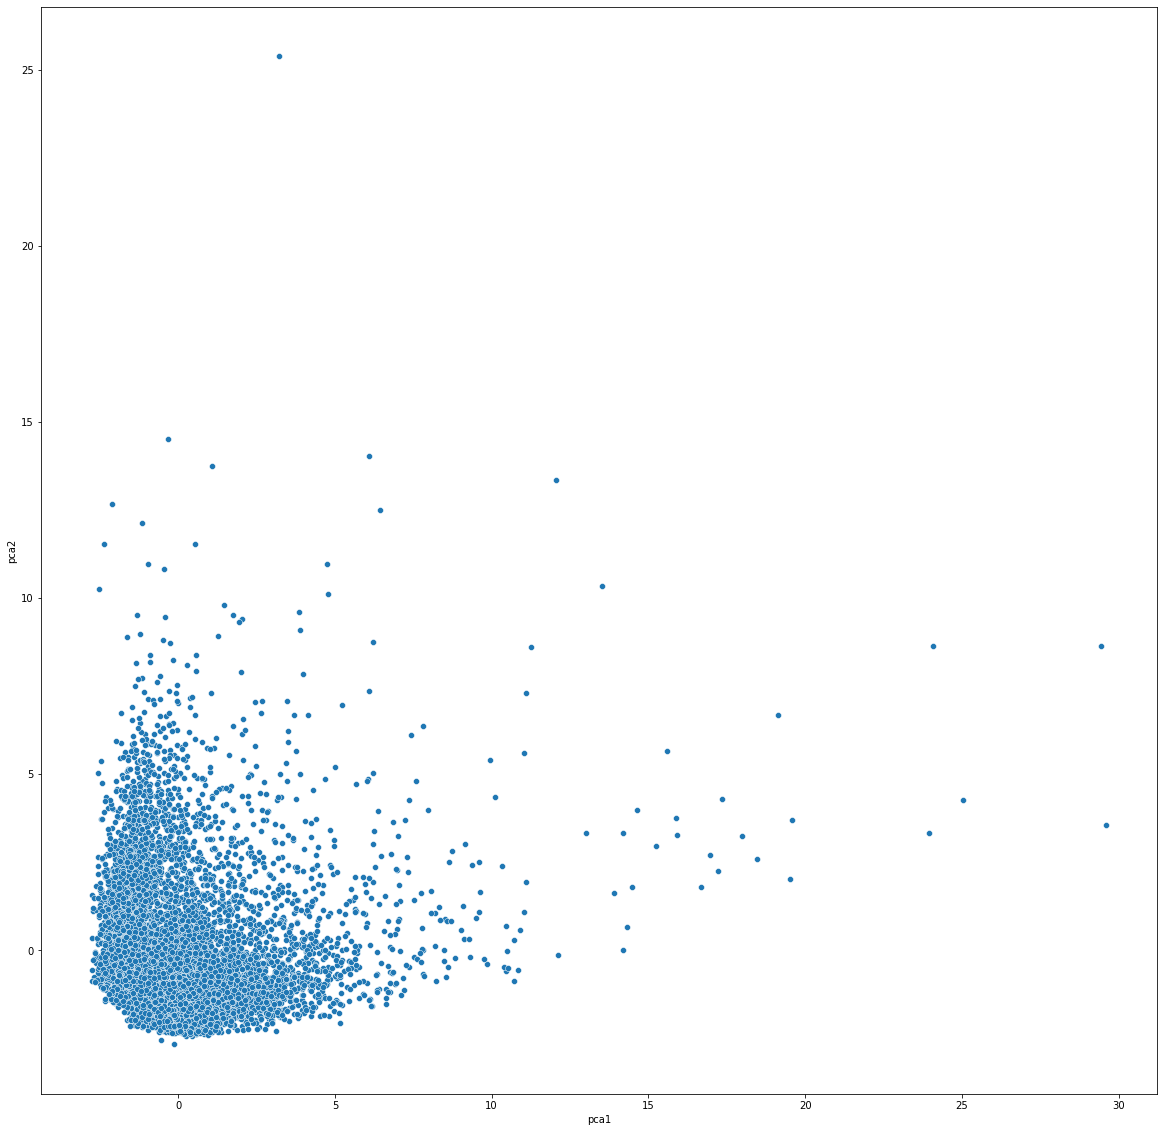

In [38]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x="pca1", y="pca2",  data = pca_df)

plt.show()

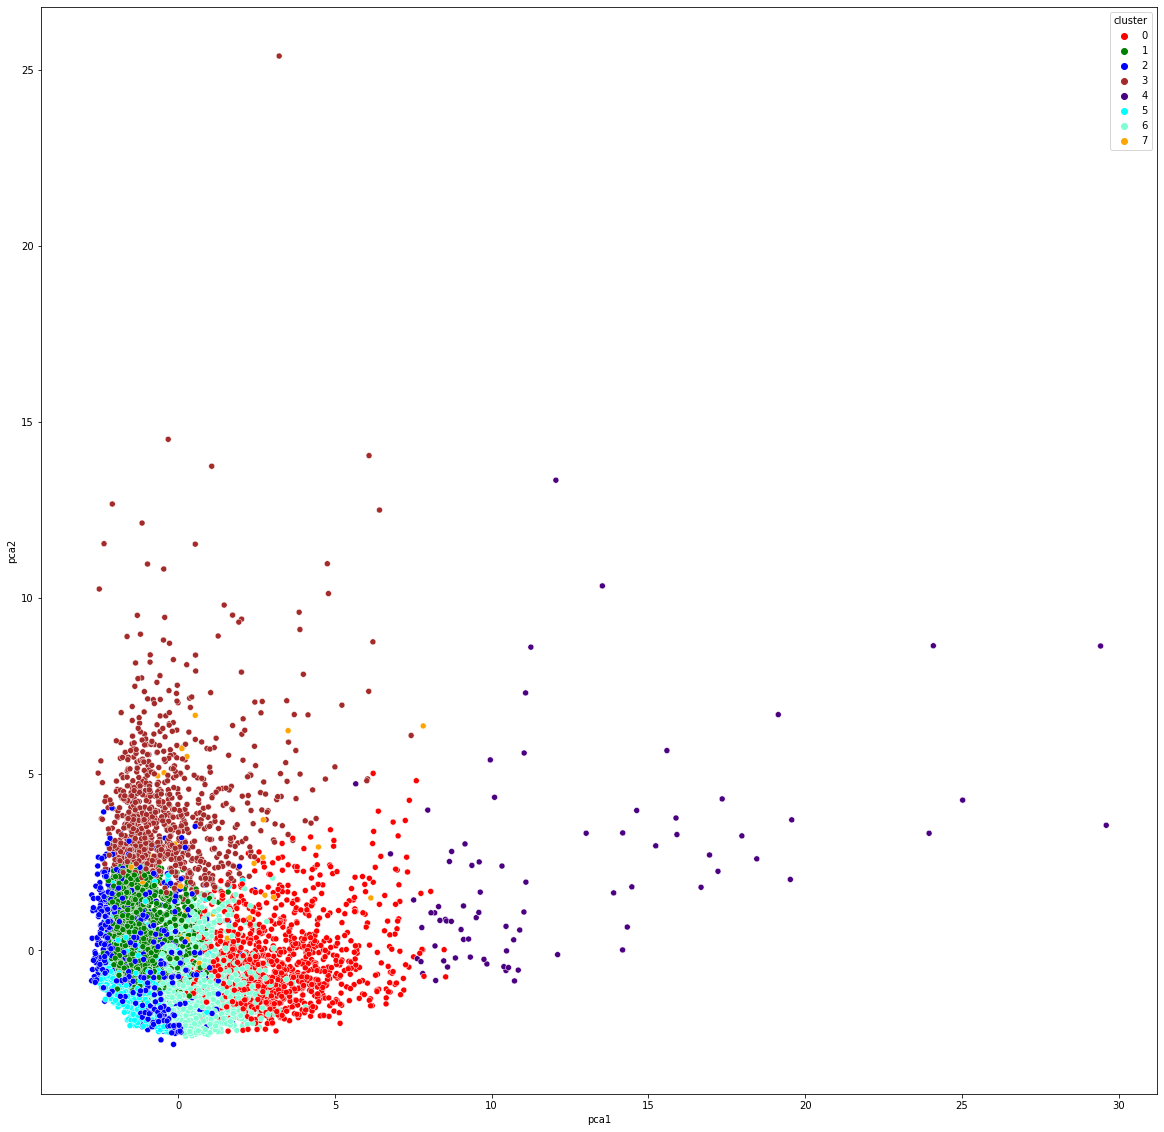

In [36]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, 
                     palette =['red','green','Blue','Brown','Indigo','Aqua','Aquamarine', 'Orange'])

plt.show()